# Carregamento dos dados

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scikitlearn as 
import missingno as msno
from scipy import stats

In [2]:
df1 = pd.read_csv('State_of_data_2022.csv')
df1.shape

In [4]:
df1.head()

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')",...,"('P8_d_2 ', 'Coletando e limpando os dados que uso para análise e modelagem.')","('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pré-Processamento dos Dados

In [5]:
df = df1.copy()

In [6]:
# Fazendo um primeiro filtro de colunas do dataframe (fiz uma análise das colunas manualmente no excel pra essa primeira seleção)
df = df[["('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_g ', 'vive_no_brasil')",
           "('P1_i_1 ', 'uf onde mora')","('P1_i_2 ', 'Regiao onde mora')","('P1_l ', 'Nivel de Ensino')","('P1_m ', 'Área de Formação')",
           "('P2_a ', 'Qual sua situação atual de trabalho?')","('P2_b ', 'Setor')","('P2_c ', 'Numero de Funcionarios')","('P2_d ', 'Gestor?')","('P2_f ', 'Cargo Atual')",
           "('P2_g ', 'Nivel')","('P2_h ', 'Faixa salarial')","('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",
           "('P2_j ', 'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?')",
           "('P2_k ', 'Você está satisfeito na sua empresa atual?')","('P2_m ', 'Você participou de entrevistas de emprego nos últimos 6 meses?')",
           "('P2_n ', 'Você pretende mudar de emprego nos próximos 6 meses?')","('P2_p ', 'Atualmente qual a sua forma de trabalho?')",
           "('P2_s ', 'Sua empresa passu por Layoff em 2022?')","('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')",
           "('P4_a_1 ', 'Atuacao')","('P4_d ', 'Quais das linguagens listadas abaixo você utiliza no trabalho?')","('P4_d_1 ', 'SQL')","('P4_d_2 ', 'R ')",
           "('P4_d_3 ', 'Python')","('P4_d_4 ', 'C/C++/C#')","('P4_d_5 ', '.NET')","('P4_d_6 ', 'Java')","('P4_d_7 ', 'Julia')","('P4_d_8 ', 'SAS/Stata')",
           "('P4_d_9 ', 'Visual Basic/VBA')","('P4_d_10 ', 'Scala')","('P4_d_11 ', 'Matlab')","('P4_d_12 ', 'PHP')","('P4_d_13 ', 'Javascript')",
           "('P4_d_14 ', 'Não utilizo nenhuma linguagem')","('P5_c ', 'Há quanto tempo você busca uma oportunidade na área de dados?')",
]]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 42 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                                  --------------  -----  
 0   ('P1_a ', 'Idade')                                                                                                                      4197 non-null   float64
 1   ('P1_a_1 ', 'Faixa idade')                                                                                                              4271 non-null   object 
 2   ('P1_b ', 'Genero')                                                                                                                     4262 non-null   object 
 3   ('P1_c ', 'Cor/raca/etnia')                                    

In [8]:
# Renomeando as colunas
# Função para extrair o nome da coluna dos títulos
def extract_column_name(title):
    return title.split(", ")[1][1:-2]

# Renomear as colunas
df.columns = [extract_column_name(title) for title in df.columns]

In [9]:
df.columns

Index(['Idade', 'Faixa idade', 'Genero', 'Cor/raca/etnia', 'PCD',
       'vive_no_brasil', 'uf onde mora', 'Regiao onde mora', 'Nivel de Ensino',
       'Área de Formação', 'Qual sua situação atual de trabalho?', 'Setor',
       'Numero de Funcionarios', 'Gestor?', 'Cargo Atual', 'Nivel',
       'Faixa salarial',
       'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua empresa atual?',
       'Você participou de entrevistas de emprego nos últimos 6 meses?',
       'Você pretende mudar de emprego nos próximos 6 meses?',
       'Atualmente qual a sua forma de trabalho?',
       'Sua empresa passu por Layoff em 2022?',
       'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?',
       'Atuacao',
       'Quais das linguagens listadas abaixo você utiliza no trabalho?', 'SQL',
       'R ', 'P

In [10]:
# Renomeando a coluna 'target' e colocando-a na posição 1
df.rename(columns={"Faixa salarial":'target'}, inplace = True)
target = df.pop("target")
df.insert(0,'target', target)
df.head()

,target,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,vive_no_brasil,uf onde mora,Regiao onde mora,Nivel de Ensino,...,Java,Julia,SAS/Stata,Visual Basic/VBA,Scala,Matlab,PHP,Javascript,Não utilizo nenhuma linguagem,Há quanto tempo você busca uma oportunidade na área de dados?
0,de R$ 8.001/mês a R$ 12.000/mês,39.0,35-39,Masculino,Parda,Não,True,DF,Centro-oeste,Pós-graduação,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,de R$ 4.001/mês a R$ 6.000/mês,32.0,30-34,Masculino,Parda,Não,True,PA,Norte,Graduação/Bacharelado,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,de R$ 12.001/mês a R$ 16.000/mês,53.0,50-54,Masculino,Branca,Não,True,DF,Centro-oeste,Pós-graduação,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
3,de R$ 12.001/mês a R$ 16.000/mês,27.0,25-29,Masculino,Branca,Não,True,MG,Sudeste,Doutorado ou Phd,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,de R$ 6.001/mês a R$ 8.000/mês,46.0,45-49,Feminino,Branca,Não,True,PA,Norte,Pós-graduação,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [11]:
df.isna().sum()

target                                                                                                                        577
Idade                                                                                                                          74
Faixa idade                                                                                                                     0
Genero                                                                                                                          9
Cor/raca/etnia                                                                                                                  0
PCD                                                                                                                             0
vive_no_brasil                                                                                                                  0
uf onde mora                                                                              

In [ ]:
# Visualização dos valores missings 
msno.bar(df, sort="descending", figsize=(10,6), fontsize=8).grid()

Inicialmente vou remover os registros que temos NA na coluna target.  
Em seguida vou remover colunas que têm muitos valores NA que vão acabar tirando grande parte da nossa amostra. 

In [13]:
# Removendo valores de target = NA
df_filtered = df.dropna(subset=['target'])
df_filtered.isna().sum()

target                                                                                                                          0
Idade                                                                                                                          51
Faixa idade                                                                                                                     0
Genero                                                                                                                          7
Cor/raca/etnia                                                                                                                  0
PCD                                                                                                                             0
vive_no_brasil                                                                                                                  0
uf onde mora                                                                              

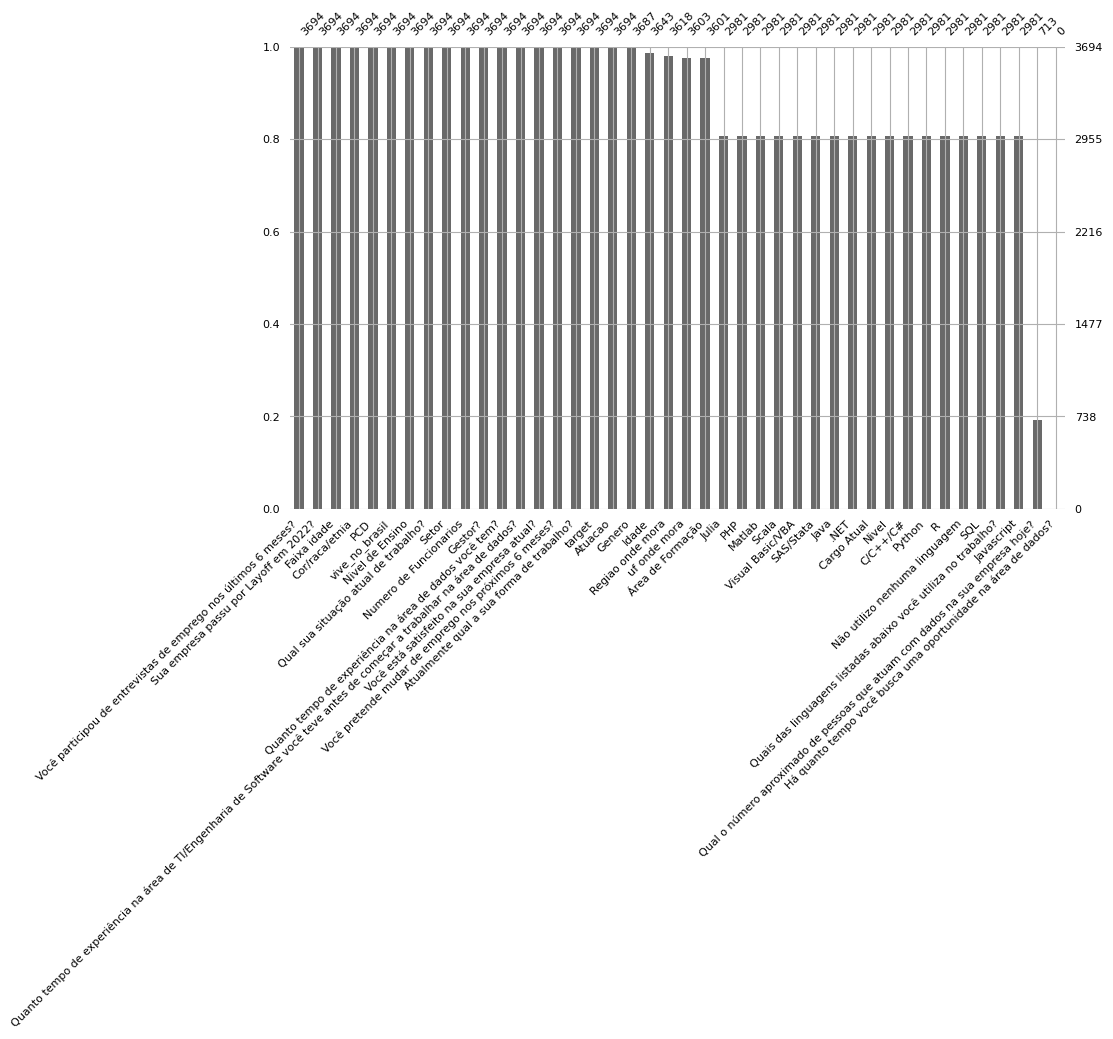

In [14]:
# Visualização dos NA
msno.bar(df_filtered, sort="descending", figsize=(10,6), fontsize=8).grid()

In [15]:
# Visualização onde temos Nível = NA
df_filtered[(df_filtered['Nivel'].isna())].iloc[:,5:20].sample(10)

,PCD,vive_no_brasil,uf onde mora,Regiao onde mora,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,Setor,Numero de Funcionarios,Gestor?,Cargo Atual,Nivel,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?
289,Não,True,RJ,Sudeste,Mestrado,Estatística/ Matemática / Matemática Computaci...,Empregado (CLT),Internet/Ecommerce,Acima de 3.000,True,NaN,NaN,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True
1174,Não,True,SP,Sudeste,Graduação/Bacharelado,Outras Engenharias,Empregado (CLT),Setor Imobiliário/ Construção Civil,de 101 a 500,True,NaN,NaN,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,True
559,Não,True,MG,Sudeste,Graduação/Bacharelado,Outras Engenharias,Empregado (CLT),Setor Imobiliário/ Construção Civil,de 6 a 10,True,NaN,NaN,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,False
2777,Não,True,PR,Sul,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Varejo,Acima de 3.000,True,NaN,NaN,Mais de 10 anos,de 3 a 4 anos,True
386,Não,True,PE,Nordeste,Pós-graduação,Outra opção,Empregado (CLT),Indústria,Acima de 3.000,True,NaN,NaN,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,True
1079,Não,True,PE,Nordeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Área de Consultoria,de 6 a 10,True,NaN,NaN,de 4 a 6 anos,Mais de 10 anos,True
1732,Não,True,SP,Sudeste,Mestrado,Química / Física,Empregado (CLT),Marketing,de 101 a 500,True,NaN,NaN,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,True
2388,Não,True,CE,Nordeste,Não tenho graduação formal,NaN,Empregado (CLT),Varejo,de 101 a 500,True,NaN,NaN,Mais de 10 anos,Mais de 10 anos,True
251,Não,True,AL,Nordeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Empreendedor ou Empregado (CNPJ),Finanças ou Bancos,de 11 a 50,True,NaN,NaN,de 3 a 4 anos,Menos de 1 ano,True
4262,Não,True,SP,Sudeste,Pós-graduação,Outras Engenharias,Empregado (CLT),Tecnologia/Fábrica de Software,de 501 a 1.000,True,NaN,NaN,de 3 a 4 anos,de 3 a 4 anos,True


In [16]:
# é possível verificar que todos os valores onde temos 'Cargo Atual' e 'Nivel' como NA, são cargos de Gestor, ou seja, não precisamos da coluna Gestor. Podemos imputar 'Gestor' na coluna 'Cargo Atual' e 'Nivel' para todos os NA e remover a coluna 'Gestor?'
df_filtered[(df_filtered['Cargo Atual'].isna())]['Gestor?'].value_counts()

True    713
Name: Gestor?, dtype: int64

In [17]:
# Valores da coluna gestor pra onde temos Nivel NA
df_filtered[(df_filtered['Nivel'].isna())]['Gestor?'].value_counts()

True    713
Name: Gestor?, dtype: int64

In [18]:
# Valores da coluna gestor pra onde temos Cargo Atual NOT NA
df_filtered[(df_filtered['Cargo Atual'].isna() == False)]['Gestor?'].value_counts()

False    2981
Name: Gestor?, dtype: int64

In [19]:
# Valores da coluna gestor pra onde temos Nivel NOT NA
df_filtered[(df_filtered['Nivel'].isna() == False)]['Gestor?'].value_counts()

False    2981
Name: Gestor?, dtype: int64

In [20]:
# Valores da coluna Cargo ATual
df_filtered[(df_filtered['Cargo Atual'].isna() == False)]['Cargo Atual'].value_counts()

Analista de Dados/Data Analyst                                         639
Cientista de Dados/Data Scientist                                      556
Engenheiro de Dados/Arquiteto de Dados/Data Engineer/Data Architect    490
Analista de BI/BI Analyst                                              378
Outra Opção                                                            281
Analista de Negócios/Business Analyst                                  123
Desenvolvedor/ Engenheiro de Software/ Analista de Sistemas            106
Analista de Suporte/Analista Técnico                                    72
Analytics Engineer                                                      70
Engenheiro de Machine Learning/ML Engineer                              69
Product Manager/ Product Owner (PM/APM/DPM/GPM/PO)                      51
Analista de Inteligência de Mercado/Market Intelligence                 29
Outras Engenharias (não inclui dev)                                     28
Professor                

In [21]:
# Removendo coluna 'Gestor?' e preenchendo os NA com "Gestor" nas colunas 'Nivel' e 'Cargo Atual'
df_filtered2 = df_filtered.copy()
df_filtered2 = df_filtered2.drop(columns=['Gestor?'])
df_filtered2[['Nivel','Cargo Atual']] = df_filtered[['Nivel','Cargo Atual']].fillna('Gestor')
df_filtered2.isna().sum()

target                                                                                                                          0
Idade                                                                                                                          51
Faixa idade                                                                                                                     0
Genero                                                                                                                          7
Cor/raca/etnia                                                                                                                  0
PCD                                                                                                                             0
vive_no_brasil                                                                                                                  0
uf onde mora                                                                              

Vou remover as colunas 'Idade', pois esta apresenta valores NA além de também ja termos a coluna de faixa etária.  
Também irei remover as colunas que possuem MUITOS valores NA como 'Há quanto tempo você busca uma oportunidade na área de dados?' e 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?'.  
Ainda a decidir se irei remover as colunas das linguagens utilizadas no trabalho

In [22]:
df_filtered2 = df_filtered2.drop(columns=["Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?","Há quanto tempo você busca uma oportunidade na área de dados?", "Idade"])
df_filtered2.isna().sum()

target                                                                                                                         0
Faixa idade                                                                                                                    0
Genero                                                                                                                         7
Cor/raca/etnia                                                                                                                 0
PCD                                                                                                                            0
vive_no_brasil                                                                                                                 0
uf onde mora                                                                                                                  91
Regiao onde mora                                                                                 

In [23]:
# Checando a relação das colunas 'vive_no_brasil' com 'uf onde mora' e 'Regiao onde mora'
# valores de 'vive_no_brasil' quando temos Regiao onde mora NA
df_filtered2[(df_filtered2['Regiao onde mora'].isna())]['vive_no_brasil'].value_counts()

False    76
Name: vive_no_brasil, dtype: int64

In [24]:
# valores de 'vive_no_brasil' quando temos Regiao onde mora not NA
df_filtered2[(df_filtered2['Regiao onde mora'].isna() == False)]['vive_no_brasil'].value_counts()

True    3618
Name: vive_no_brasil, dtype: int64

Novamente, aqui irei remover a coluna vive_no_brasil e preencher os valores de NA da coluna 'Regiao onde mora' com 'Exterior'. Também irei remover a coluna 'uf onde mora' e manter apenas a 'Regiao onde mora'

In [25]:
df_filtered2 = df_filtered2.drop(columns=['vive_no_brasil', 'uf onde mora'])
df_filtered2['Regiao onde mora'] = df_filtered2['Regiao onde mora'].fillna('Exterior')
df_filtered2.isna().sum()

target                                                                                                                         0
Faixa idade                                                                                                                    0
Genero                                                                                                                         7
Cor/raca/etnia                                                                                                                 0
PCD                                                                                                                            0
Regiao onde mora                                                                                                               0
Nivel de Ensino                                                                                                                0
Área de Formação                                                                                 

In [26]:
# Visualizando onde temos valores de Genero NA.
# Tenhos três opções: preencher com 'Prefiro não informar', preencher aleatóriamente com base nos valores que temos ou remover esses registros. 
# Vou decidir por dropar os NA da coluna Genero"Prefiro não informar" 
# Vale repensar/testar se vale a pena remover esses juntos com os "Prefiro não informar"
df_filtered2[(df_filtered2['Genero'].isna())]

,target,Faixa idade,Genero,Cor/raca/etnia,PCD,Regiao onde mora,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,Setor,...,.NET,Java,Julia,SAS/Stata,Visual Basic/VBA,Scala,Matlab,PHP,Javascript,Não utilizo nenhuma linguagem
232,de R$ 2.001/mês a R$ 3.000/mês,25-29,NaN,Branca,Não,Sul,Pós-graduação,Ciências Sociais,Empregado (CLT),Área de Consultoria,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1484,de R$ 1.001/mês a R$ 2.000/mês,25-29,NaN,Preta,Não,Sudeste,Graduação/Bacharelado,Outras Engenharias,Estagiário,Finanças ou Bancos,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2463,de R$ 2.001/mês a R$ 3.000/mês,25-29,NaN,Preta,Não,Centro-oeste,Graduação/Bacharelado,Ciências Sociais,Empreendedor ou Empregado (CNPJ),Filantropia/ONG's,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2583,de R$ 8.001/mês a R$ 12.000/mês,25-29,NaN,Branca,Não,Sudeste,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empregado (CLT),Setor Imobiliário/ Construção Civil,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3302,de R$ 3.001/mês a R$ 4.000/mês,25-29,NaN,Parda,Não,Sul,Pós-graduação,Outra opção,Servidor Público,Setor Público,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3722,de R$ 2.001/mês a R$ 3.000/mês,22-24,NaN,Branca,Não,Sudeste,Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Estagiário,Tecnologia/Fábrica de Software,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3955,de R$ 16.001/mês a R$ 20.000/mês,22-24,NaN,Branca,Não,Sudeste,Mestrado,Outras Engenharias,Empregado (CLT),Área de Consultoria,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_filtered2['Genero'].value_counts()

Masculino               2790
Feminino                 886
Prefiro não informar      11
Name: Genero, dtype: int64

In [28]:
df_filtered3 = df_filtered2.copy()
df_filtered3 = df_filtered3.dropna(subset=['Genero'])
df_filtered3.isna().sum()

target                                                                                                                         0
Faixa idade                                                                                                                    0
Genero                                                                                                                         0
Cor/raca/etnia                                                                                                                 0
PCD                                                                                                                            0
Regiao onde mora                                                                                                               0
Nivel de Ensino                                                                                                                0
Área de Formação                                                                                 

In [29]:
# Checando valores da coluna 'Área de Formação'
df_filtered3[(df_filtered3['Área de Formação'].isna())]

,target,Faixa idade,Genero,Cor/raca/etnia,PCD,Regiao onde mora,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,Setor,...,.NET,Java,Julia,SAS/Stata,Visual Basic/VBA,Scala,Matlab,PHP,Javascript,Não utilizo nenhuma linguagem
44,Menos de R$ 1.000/mês,17-21,Masculino,Parda,Não,Sul,Não tenho graduação formal,NaN,Prefiro não informar,Outra Opção,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
171,de R$ 16.001/mês a R$ 20.000/mês,40-44,Masculino,Branca,Não,Sudeste,Não tenho graduação formal,NaN,Empregado (CLT),Tecnologia/Fábrica de Software,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,de R$ 1.001/mês a R$ 2.000/mês,40-44,Feminino,Preta,Não,Sudeste,Não tenho graduação formal,NaN,Empregado (CLT),Varejo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307,de R$ 3.001/mês a R$ 4.000/mês,30-34,Masculino,Parda,Não,Sul,Não tenho graduação formal,NaN,Empregado (CLT),Setor Alimentício,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
318,de R$ 4.001/mês a R$ 6.000/mês,25-29,Masculino,Branca,Não,Sul,Não tenho graduação formal,NaN,Empregado (CLT),Educação,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,de R$ 6.001/mês a R$ 8.000/mês,25-29,Masculino,Branca,Não,Sudeste,Não tenho graduação formal,NaN,Empregado (CLT),Área de Consultoria,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4179,de R$ 3.001/mês a R$ 4.000/mês,30-34,Masculino,Parda,Não,Sudeste,Prefiro não informar,NaN,Empregado (CLT),Outra Opção,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4208,de R$ 3.001/mês a R$ 4.000/mês,30-34,Masculino,Branca,Não,Sudeste,Não tenho graduação formal,NaN,Empregado (CLT),Outra Opção,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4238,de R$ 2.001/mês a R$ 3.000/mês,22-24,Masculino,Branca,Não,Nordeste,Não tenho graduação formal,NaN,Empregado (CLT),Setor Alimentício,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
# Confirmando que todos os valores de Área de formação NA são pessoal que nao tem graduação formal
df_filtered3[(df_filtered3['Área de Formação'].isna())]['Nivel de Ensino'].value_counts()

Não tenho graduação formal    84
Prefiro não informar           9
Name: Nivel de Ensino, dtype: int64

In [31]:
# Atribuindo 'Sem Formação Formal' para os valores NA que têm 'Nivel de Ensino' com valor = 'Não tenho graduação formal'.  Irei remover os NA restante logo em seguida

#df_filtered3[((df_filtered3['Área de Formação'].isna()) & (df_filtered3['Nivel de Ensino'] == 'Não tenho graduação formal'))]['Área de Formação'] = 'Sem Formação Formal' --> errado

df_filtered3.loc[(df_filtered3['Área de Formação'].isna()) & (df_filtered3['Nivel de Ensino'] == 'Não tenho graduação formal'), 'Área de Formação'] = 'Sem Formação Formal'
df_filtered3 = df_filtered3.dropna(subset=['Área de Formação'])


In [32]:
df_filtered3.isna().sum()

target                                                                                                                         0
Faixa idade                                                                                                                    0
Genero                                                                                                                         0
Cor/raca/etnia                                                                                                                 0
PCD                                                                                                                            0
Regiao onde mora                                                                                                               0
Nivel de Ensino                                                                                                                0
Área de Formação                                                                                 

Agora vou remover a pergunta das linguagens utilizadas devido ao grande numero de NA

In [33]:
df_filtered3 = df_filtered3.iloc[:, :-15]
df_filtered3.isna().sum()

target                                                                                                                       0
Faixa idade                                                                                                                  0
Genero                                                                                                                       0
Cor/raca/etnia                                                                                                               0
PCD                                                                                                                          0
Regiao onde mora                                                                                                             0
Nivel de Ensino                                                                                                              0
Área de Formação                                                                                               

In [34]:
df_filtered3.shape

(3678, 21)

In [39]:
# Checando valores da coluna 'Qual sua situação atual de trabalho?'
df_filtered3['Área de Formação'].value_counts()

Computação / Engenharia de Software / Sistemas de Informação/ TI          1367
Outras Engenharias                                                         827
Economia/ Administração / Contabilidade / Finanças/ Negócios               558
Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais     355
Outra opção                                                                161
Marketing / Publicidade / Comunicação / Jornalismo                         108
Química / Física                                                            85
Sem Formação Formal                                                         84
Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde                      80
Ciências Sociais                                                            53
Name: Área de Formação, dtype: int64

É possível ver que a coluna Idade teve diversos valores faltantes, portanto irei usar 'faixa de idade'


# Análise Exploratória

In [ ]:
df.target.hist(grid = True, xrot = 90)

# Pré-Processamento de Dados

# Machine Learning